In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Seaborn version: ", sns.__version__)

Seaborn version:  0.9.0


In [34]:
game_data = pd.read_csv('D1_2015_Processed_Stats.csv')
print("Number of records= ", game_data.shape[0])
game_data.head()
#game_data.info()

Number of records=  5149


,points_game,field_goals_pct,offensive_rebounds,free_throws_att,free_throws_pct,turnovers,win_pct,game_id,home_team,market,opp_market,game_result,game_date
0,6.0,7.5,-3.0,4.0,-0.8,2.0,0.0,59217c6a-34da-48ef-8753-a7b1e5bb5998,False,UNC Asheville,Western Carolina,LOSS,11/15/2015
1,-4.0,-4.1,-5.0,-13.0,11.1,1.0,0.0,1bb9c45c-80e8-40e4-80f3-84a795135434,True,South Dakota,Cal State Northridge,WIN,11/15/2015
2,6.0,-5.2,-7.0,-6.0,27.6,-5.0,1.0,347c62d0-c3ca-4688-9fa0-aa21fa5746f9,True,Wright State,Cal State Northridge,LOSS,11/15/2015
3,0.5,3.0,8.5,1.5,-14.4,4.0,0.0,2bb9a40e-50d9-4a5b-95a5-a49e609df45f,True,Northern Illinois,Wright State,WIN,11/15/2015
4,10.0,1.1,-1.0,7.0,-0.5,-17.0,1.0,07c058c3-ad3c-4af0-a78a-feeda651785e,True,Clemson,UTSA,WIN,11/15/2015


In [35]:
game_data.describe()

,points_game,field_goals_pct,offensive_rebounds,free_throws_att,free_throws_pct,turnovers,win_pct
count,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000,5149.000000
mean,-0.136139,-0.077959,0.019842,0.025055,-0.061329,0.003747,0.000102
std,9.659450,4.940401,2.767151,5.255297,7.190500,2.456641,0.322479
min,-59.000000,-30.000000,-15.000000,-31.000000,-42.400000,-17.000000,-1.000000
25%,-6.200000,-2.969444,-1.652174,-3.052632,-4.314286,-1.457143,-0.196970
50%,-0.399038,-0.113810,0.000000,0.000000,-0.145952,-0.029412,0.000000
75%,5.813187,2.703846,1.686667,3.095238,4.218841,1.422609,0.183333
max,79.000000,30.600000,12.000000,33.000000,68.350000,14.000000,1.000000


In [36]:
# How many games with win game_result = 1?
game_data['game_result'].value_counts()

LOSS    2606
WIN     2543
Name: game_result, dtype: int64

In [37]:
game_data[game_data['points_game'] > 30][['points_game','game_result','market','opp_market','game_id']]

,points_game,game_result,market,opp_market,game_id
16,34.000000,WIN,North Carolina,Fairfield,ca129e37-d9a8-43e7-9a80-48d35a89fea1
25,33.000000,WIN,Oklahoma State,Arkansas-Pine Bluff,1331ec73-910b-494e-a0e9-3d83efd75ff6
44,38.000000,WIN,Canisius,Lehigh,f2a8ed4c-7c92-45d5-adb0-0e2d8bfa39c3
48,33.000000,WIN,Charleston,Navy,2ee3e6f6-79d4-4714-9dcc-6f2c449dc26c
55,38.000000,LOSS,Mississippi State,Southern University,edf3b944-59e3-4821-a397-8026de12991f
59,34.000000,WIN,North Florida,Texas Rio Grande Valley,5470fb5e-c993-4199-bc39-b0a6556013df
61,47.000000,WIN,Indiana,Austin Peay,f2a0720b-0cda-4cb5-907d-ac8f535c8bc8
82,34.500000,WIN,Cornell,Binghamton,8115e098-dd17-4476-acbc-3053991bb2fe
84,41.000000,WIN,Florida State,Jacksonville,696f2112-fef5-46b1-add7-7712ab9efb0a
108,79.000000,WIN,Butler,Missouri State,5abef9cc-c7b7-4246-8c87-96cdc58bd6dc


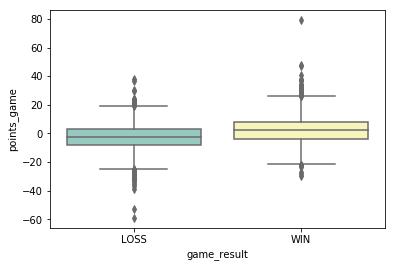

In [38]:
#sns.set(style="whitegrid")
sns.boxplot(x="game_result", y="points_game",data =game_data, palette="Set3")

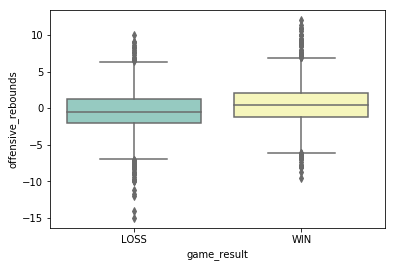

In [39]:
sns.boxplot(x="game_result", y="offensive_rebounds",data =game_data, palette="Set3")

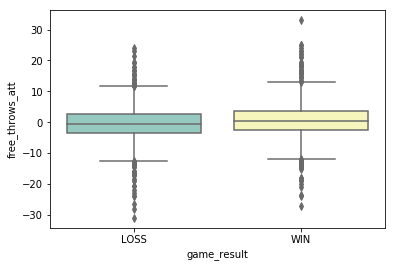

In [40]:
sns.boxplot(x="game_result", y="free_throws_att",data =game_data, palette="Set3")

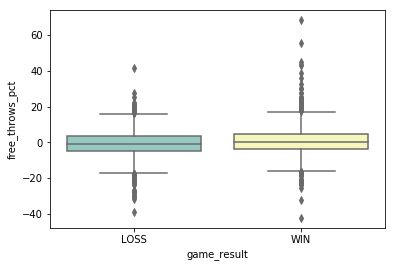

In [41]:
sns.boxplot(x="game_result", y="free_throws_pct",data =game_data, palette="Set3")

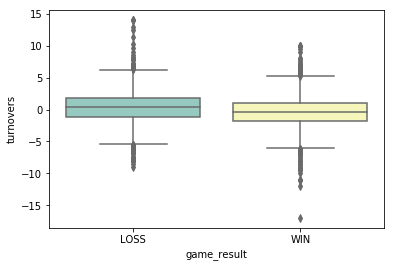

In [42]:
sns.boxplot(x="game_result", y="turnovers",data =game_data, palette="Set3")

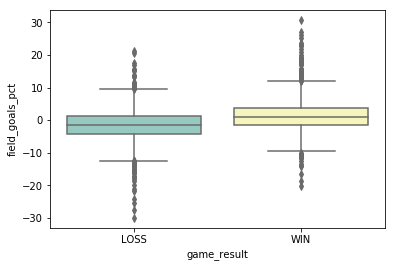

In [43]:
sns.boxplot(x="game_result", y="field_goals_pct",data =game_data, palette="Set3")

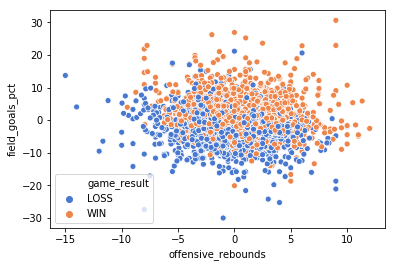

In [44]:
sns.scatterplot(x="offensive_rebounds", y="field_goals_pct",hue="game_result",data =game_data, palette=sns.color_palette("muted", 2))

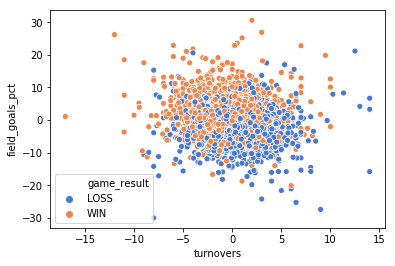

In [45]:
sns.scatterplot(x="turnovers", y="field_goals_pct",hue="game_result",data =game_data, palette=sns.color_palette("muted", 2))

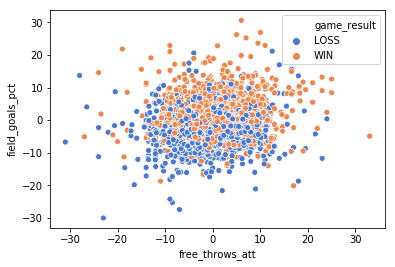

In [46]:
sns.scatterplot(x="free_throws_att", y="field_goals_pct",hue="game_result",data =game_data, palette=sns.color_palette("muted", 2))

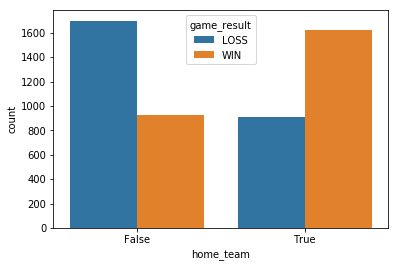

In [47]:
sns.countplot(x='home_team', hue='game_result', data=game_data)